# Bitcoin Cryptocurrency Prediction using Tensorflow and LSTM Data Wrangling

## CSX 433.7 Machine Learning with Tensorflow Final Project

## Data Wrangling

Alison Jing Huang

Elaine Phan


In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
### importing Bitcoin data by 32 day days in May 2018 to june 2018
Bitcoin = pd.read_excel("BitcoinHistoricalDataByDay.xlsx", index_col='Date',parse_dates=True)
Bitcoin.head(1)
df = Bitcoin
Bitcoin.sort_index(inplace=True)

### importing Bitcoin data by 2010 to 2018 day days in May 2018 to june 2018
#Bitcoin1018 = pd.read_csv('HistoricalDataByDay2010to2018comma.csv')
#Bitcoin1018.head(1)
Bitcoin1018 = pd.read_excel("BitcoinHistoricalDataByDay2010to2018.xlsx", index_col='Date',parse_dates=True)
Bitcoin1018.head(1)

Bitcoinmonth = pd.read_excel("BitcoinHistoricalDataByWeek.xlsx")
Bitcoin1018.head(1)
### import Bitcoin time series  data for 1hr csv

df_timeseries = pd.read_csv('Coinbase_BTCUSD_1h.csv',index_col='Date',parse_dates=True)# add parse dates
df_timeseries.head(1)

### import timeseries 1hr for comparing 3 types of coins
Bit = pd.read_csv('Coinbase_BTCUSD_1h.csv')
Bit.head(1)

#etherum data set 
Eth = pd.read_csv('Coinbase_ETHUSD_1h.csv')
Eth.head(1)

#Litcoin
Lit = pd.read_csv('Coinbase_LTCUSD_1h.csv')
Lit.head(1)



In [2]:
import datetime

In [3]:
# start date and end date to compare the graph of Bitcoin, Litcoin and Ethereum
start = datetime.date(2017,1,1)
end = datetime.date(2018,1,1)

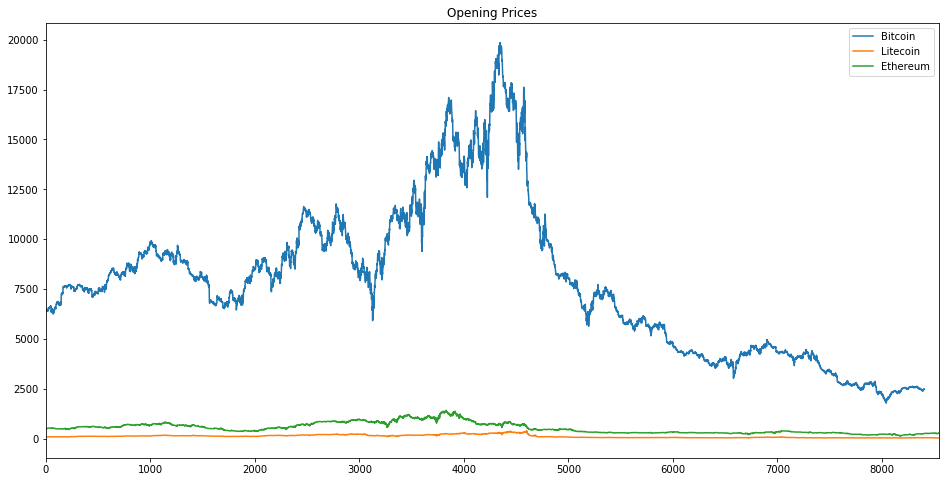

In [4]:

# plot open price Bitcoin to litcoin and ethereum
Bit['Open'].plot(label="Bitcoin", figsize=(16,8),title="Opening Prices")
Lit['Open'].plot(label='Litecoin')
Eth['Open'].plot(label='Ethereum')
plt.legend()



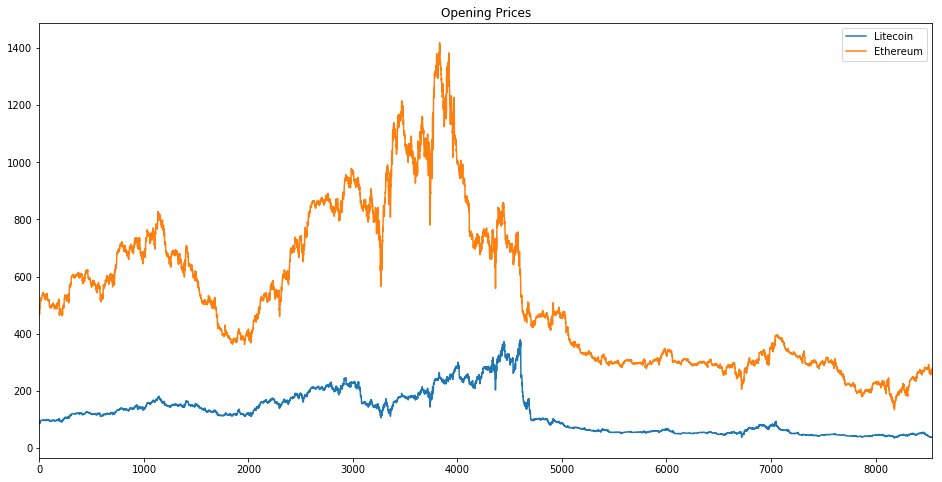

In [5]:

# plot open price litecoin and ethereum
Lit['Open'].plot(label="Litecoin", figsize=(16,8),title="Opening Prices")
Eth['Open'].plot(label='Ethereum')

plt.legend()


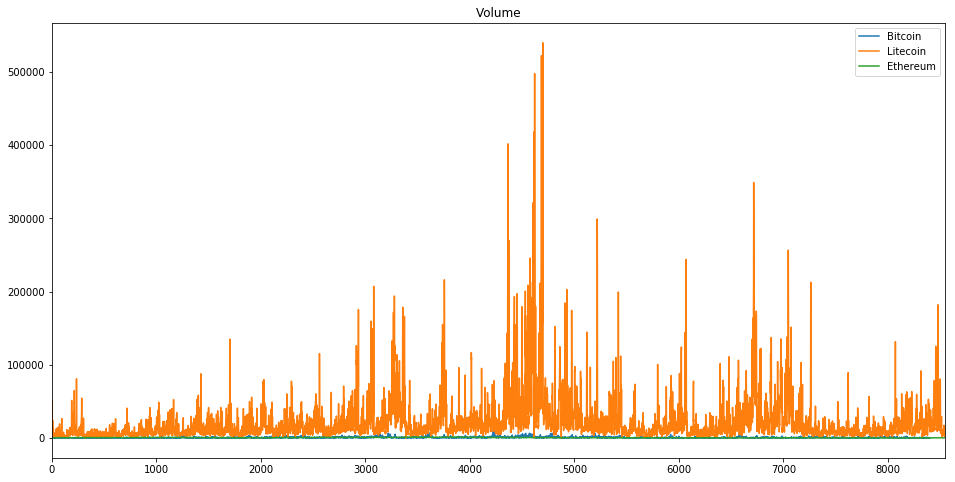

In [6]:

# plot volume Bitcoin to litcoin and ethereum
Bit['Volume From'].plot(label="Bitcoin", figsize=(16,8),title="Volume")
Lit['Volume From'].plot(label='Litecoin')
Eth['Open'].plot(label='Ethereum')
plt.legend()

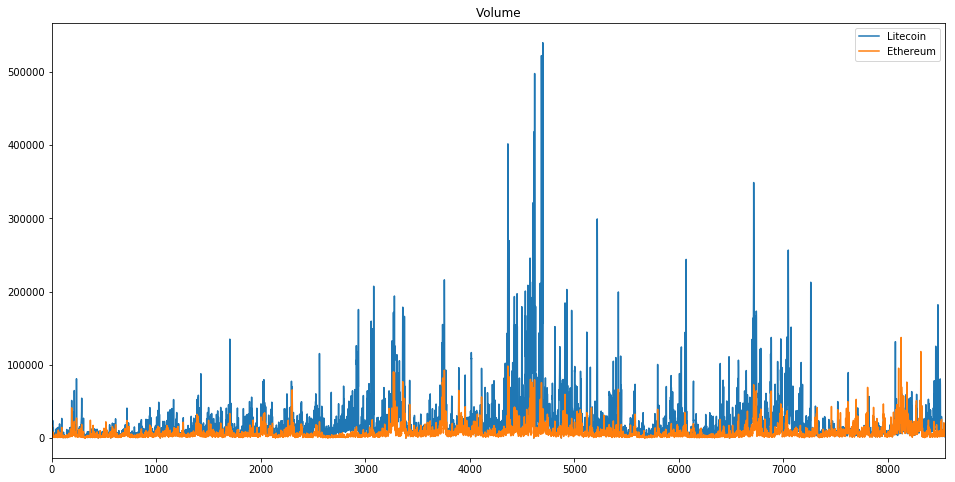

In [7]:
# plot volume litcoin and ethereum
Lit['Volume From'].plot(label='Litecoin', figsize=(16,8),title="Volume")
Eth['Volume From'].plot(label="Ethereum")


plt.legend()

In [8]:
#date row number for the highest price when Bitcoin it open
Bit['Open'].argmax()



4347

In [9]:
#date for the highest price when Bitcoin it open
Bit.loc[[4347],["Date","Open",'High']]

,Date,Open,High
4347,2017-12-17 12-PM,19847.11,19891.99


In [10]:
#Find Row for the highest price when Ethereum it open
Eth['Open'].argmax()



3829

In [11]:
#date for the highest price when Ethereum it open
Eth.loc[[3829],["Date","Open",'High']]

,Date,Open,High
3829,2018-01-13 09-PM,1418.61,1419.96


In [12]:
#Find Row number date for the highest price when Litecoin it open
Lit['Open'].argmax()

4602

In [13]:
#date for the highest price when Lite coin it open
Bit.loc[[4898],["Date","Open",'High']]

,Date,Open,High
4898,2017-11-24 01-PM,8215.01,8223.99


In [14]:
# find value of bitcoin price in 32 days that was above 8000
df[df['Price']>8000]

,Price,Open,High,Low,Vol.,Change _Percentage
Date,,,,,,
2018-05-14,8674.1,8693.4,8878.3,8305.1,212.05K,-0.0022
2018-05-15,8477.0,8674.0,8842.1,8436.5,179.62K,-0.0227
2018-05-16,8344.4,8477.0,8496.4,8120.1,188.03K,-0.0156
2018-05-17,8063.0,8344.6,8458.7,8022.3,154.36K,-0.0337
2018-05-18,8245.7,8064.4,8273.6,7939.8,150.32K,0.0227
2018-05-19,8245.1,8244.7,8389.1,8153.2,107.89K,-0.0001
2018-05-20,8529.0,8243.9,8580.4,8184.7,113.76K,0.0344
2018-05-21,8403.3,8529.5,8550.6,8375.5,115.52K,-0.0147
2018-05-22,8006.0,8403.8,8414.5,7979.3,137.51K,-0.0473


In [15]:
# find value of bitcoin price in 32 days that was above 8000
df[df['Price']<7000]

,Price,Open,High,Low,Vol.,Change _Percentage
Date,,,,,,
2018-06-10,6775.1,7515.8,7516.3,6668.1,275.69K,-0.0985
2018-06-11,6885.9,6775.2,6910.8,6657.2,174.88K,0.0164
2018-06-12,6558.2,6885.9,6887.2,6476.0,178.26K,-0.0476
2018-06-13,6312.3,6558.5,6624.6,6129.1,237.48K,-0.0375
2018-06-14,6487.0,6312.3,6521.7,6283.6,245.71K,0.0277


In [16]:
#looking at prices below 10 for data set 2010 to 2018
Bitcoin1018[Bitcoin1018['Price']<10]

,Price,Open,High,Low,Vol.,Change _Percentage
Date,,,,,,
2012-08-22,9.8,9.9,10.1,9.6,67.51K,-0.0111
2012-08-21,9.9,10.1,10.3,9.7,72.08K,-0.0178
2012-08-19,8.0,11.6,11.6,7.6,238.86K,-0.3109
2012-08-01,9.6,9.4,9.6,9.1,68.70K,0.0214
2012-07-31,9.4,9.1,9.4,9.1,70.17K,0.0275
2012-07-30,9.1,8.7,9.1,8.7,51.26K,0.0448
2012-07-29,8.7,8.9,8.9,8.7,11.46K,-0.0202
2012-07-28,8.9,8.9,8.9,8.7,16.17K,0.0000
2012-07-27,8.9,8.9,8.9,8.8,26.67K,0.0000


In [17]:
#looking at prices above 1700 for data set 2010 to 2018
Bitcoin1018[Bitcoin1018['Price']>17000]

,Price,Open,High,Low,Vol.,Change _Percentage
Date,,,,,,
2018-01-06,17172.3,16954.8,17252.8,16286.6,83.93K,0.0128
2017-12-19,17523.7,18971.2,19022.0,16812.8,174.54K,-0.0764
2017-12-18,18972.3,19065.7,19221.1,18114.4,139.25K,-0.0049
2017-12-17,19065.7,19346.6,19870.6,18750.9,117.41K,-0.0145
2017-12-16,19345.5,17594.1,19587.7,17318.5,112.17K,0.0989
2017-12-15,17604.8,16467.9,17987.0,16442.2,153.65K,0.0690
2017-12-12,17083.9,16733.3,17560.7,16254.5,132.85K,0.0210


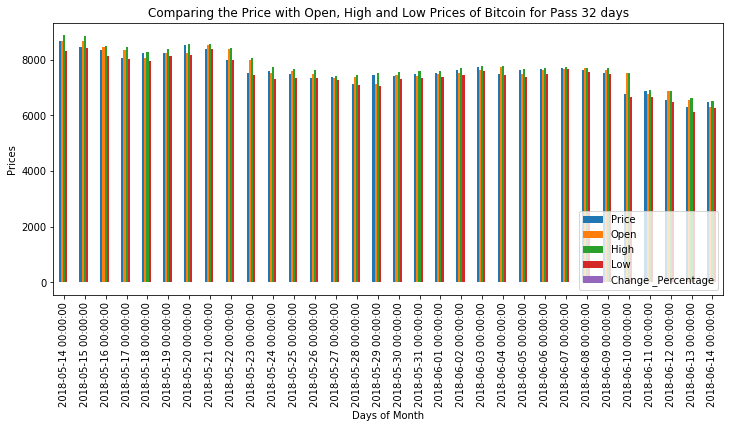

In [18]:
#plotting bar graphs to compare price with open, high and low prices of Bitcoin 32 day
df.sort_index(inplace=True)
df.plot.bar(figsize=(12,5),title="Comparing the Price with Open, High and Low Prices of Bitcoin for Pass 32 days")
plt.xlabel("Days of Month")
plt.ylabel("Prices")
plt.legend(loc='lower right')

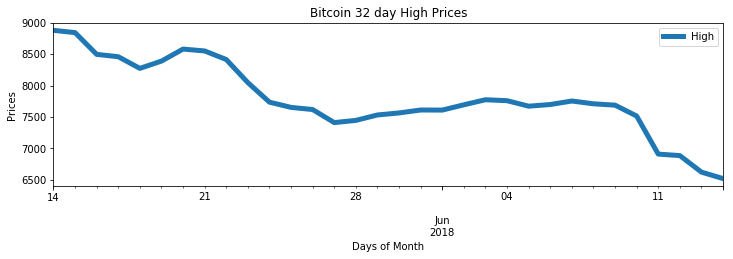

In [19]:
# line plot for the high values
df.sort_index(inplace=True)
df.plot.line(x = df.index, y = 'High', figsize=(12,3), lw = 5, title='Bitcoin 32 day High Prices')

plt.xlabel("Days of Month")
plt.ylabel("Prices")

In [20]:
#Calculate the Daily percent return column 
Bitcoin['returns'] = Bitcoin['Price'].pct_change(1)
Bitcoinmonth['returns'] = Bitcoinmonth['Price'].pct_change(1)
Bitcoin1018['returns'] = Bitcoin1018['Price'].pct_change(1)

In [21]:
#showing the new Daily percent return column 
Bitcoin.head(3)

,Price,Open,High,Low,Vol.,Change _Percentage,returns
Date,,,,,,,
2018-05-14,8674.1,8693.4,8878.3,8305.1,212.05K,-0.0022,NaN
2018-05-15,8477.0,8674.0,8842.1,8436.5,179.62K,-0.0227,-0.022723
2018-05-16,8344.4,8477.0,8496.4,8120.1,188.03K,-0.0156,-0.015642


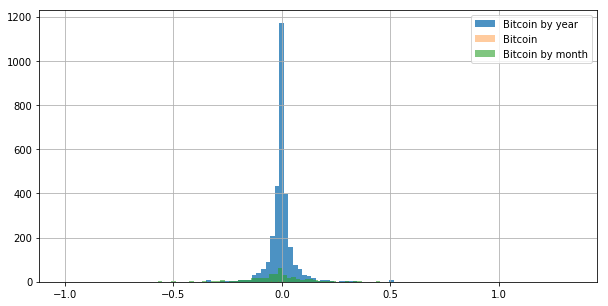

In [22]:
#Graphing the daily return of Bitcoin by day, month and year
Bitcoin1018['returns'].hist(bins =100,label='Bitcoin by year',figsize=(10,5),alpha=0.8)
Bitcoin['returns'].hist(bins =100,label='Bitcoin',figsize=(10,5),alpha=0.4)
Bitcoinmonth['returns'].hist(bins =100,label='Bitcoin by month',figsize=(10,5),alpha=0.6)

plt.legend()

In [23]:
# Calculate the daily return for closing cost and input in new column
Bit['returns'] = Bit['Close'].pct_change(1)
Eth['returns'] = Eth['Close'].pct_change(1)
Lit['returns'] = Lit['Close'].pct_change(1)

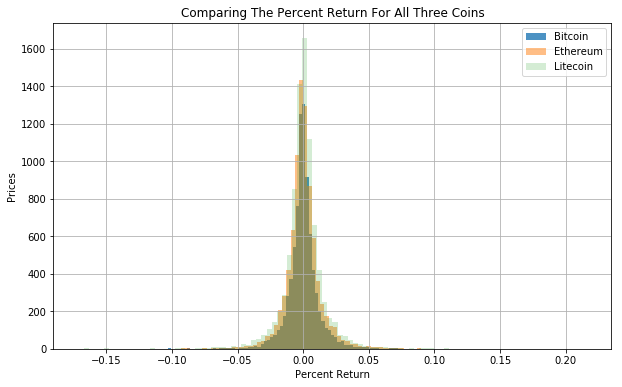

In [24]:
#plotting the graph of the Percent return for all three coins.
Bit['returns'].hist(bins =100,label='Bitcoin',figsize=(10,6),alpha=0.8)
Eth['returns'].hist(bins =100,label='Ethereum',figsize=(10,6),alpha=0.5)
Lit['returns'].hist(bins =100,label='Litecoin',figsize=(10,6),alpha=0.2)
plt.title('Comparing The Percent Return For All Three Coins')
plt.xlabel("Percent Return")
plt.ylabel("Prices")
plt.legend()

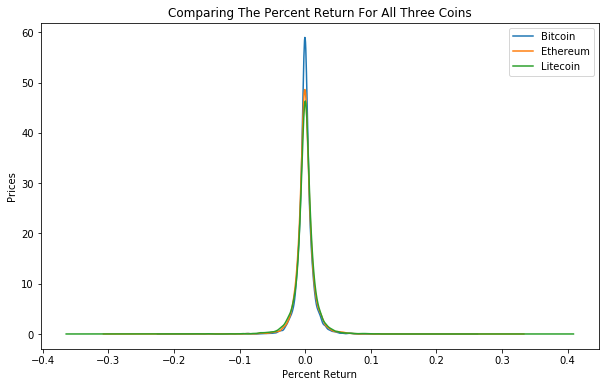

In [25]:
Bit['returns'].plot(kind='kde',label='Bitcoin',figsize=(10,6))
Eth['returns'].plot(kind='kde',label='Ethereum',figsize=(10,6))
Lit['returns'].plot(kind='kde',label='Litecoin',figsize=(10,6))
plt.title('Comparing The Percent Return For All Three Coins')
plt.xlabel("Percent Return")
plt.ylabel("Prices")
plt.legend()

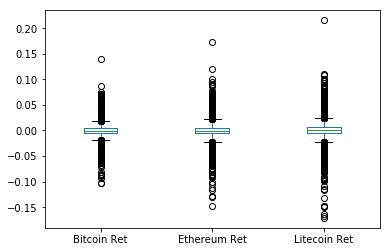

In [26]:
#Ploting the box plot for Bitcoin, Ethereum and Lightcoin
box_df =pd.concat([Bit['returns'],Eth['returns'],Lit['returns']],axis=1)
box_df.columns=['Bitcoin Ret','Ethereum Ret', 'Litecoin Ret']
box_df.plot(kind='box')

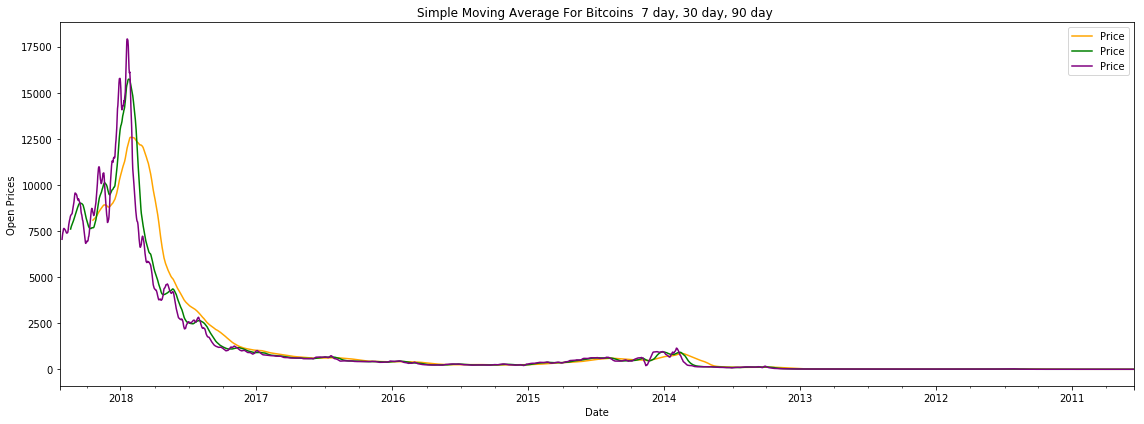

In [27]:
#moving average of 7 day, 30 day and 90 day from 2010 to 2018

Bitcoin1018.rolling(window=90).mean()['Price'].plot(figsize=(16,6),color='orange')
Bitcoin1018.rolling(window=30).mean()['Price'].plot(figsize=(16,6),color='green')
Bitcoin1018.rolling(window=7).mean()['Price'].plot(figsize=(16,6),color='purple')

plt.title('Simple Moving Average For Bitcoins  7 day, 30 day, 90 day ')
plt.xlabel("Date")
plt.ylabel("Open Prices")
plt.tight_layout()
plt.legend()
plt.show()

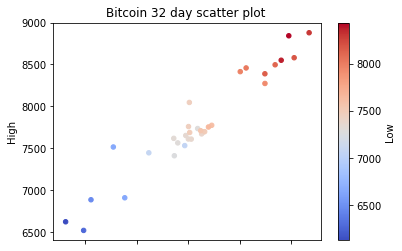

In [28]:
# using scatter plot to plot 32 day  of x =price y = high and c=low$› coolwarm map of low price
df.plot.scatter(x='Price', y ='High', c ='Low', cmap= 'coolwarm')
plt.tight_layout
plt.title('Bitcoin 32 day scatter plot ')


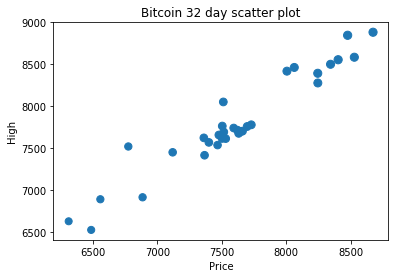

In [29]:
# using scatter plot to plot 32 day  of x =price y = high
df.plot.scatter(x='Price', y ='High', s=df['Low']*.008)
plt.title('Bitcoin 32 day scatter plot')

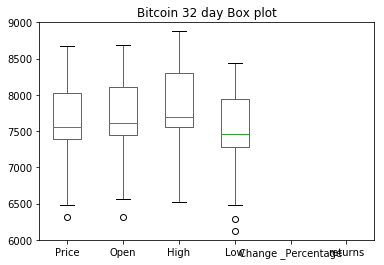

In [30]:
#Box plot for Bitcoin 32 day data set May-June 2018
df.plot.box()
plt.ylim(6000, 9000)
plt.title('Bitcoin 32 day Box plot')

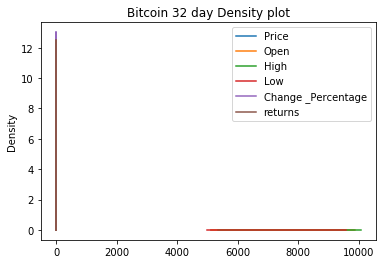

In [31]:
#Density graph of all the parameters Price, Open, High, Low
#An advantage Density Plots have over Histograms is that they're better 
#at determining the distribution shape because they're not affected by 
#the number of bins used (each bar used in a typical histogram). 
Bitcoin.plot.density()
plt.title('Bitcoin 32 day Density plot')#Density graph of all the parameters Price, Open, High, Low


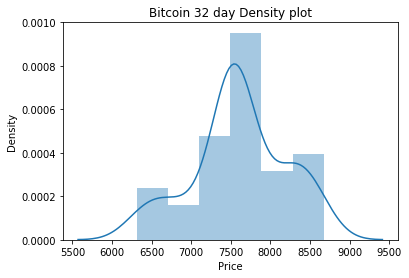

In [32]:
# density plot
import seaborn as sns
sns.distplot(df['Price'])
plt.title('Bitcoin 32 day Density plot')
plt.ylabel("Density")

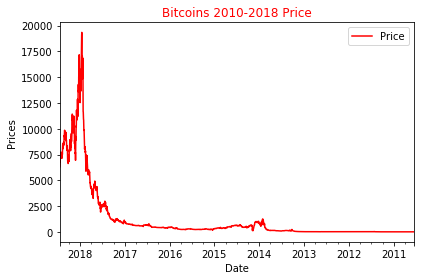

In [40]:
#plot line graph to show bitcoin year to year prices
Bitcoin1018['Price'].plot(color='red')
plt.title('Bitcoins 2010-2018 Price', color='red')
plt.xlabel("Date")
plt.ylabel("Prices")
plt.tight_layout()
plt.legend()

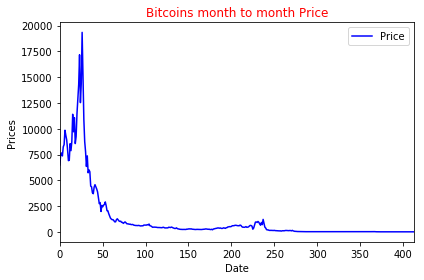

In [34]:
##plot line graph to show bitcoin month to month prices

df.sort_index(inplace=True)
Bitcoinmonth['Price'].plot(color='Blue')
plt.title('Bitcoins month to month Price', color='red')
plt.xlabel("Date")
plt.ylabel("Prices")
plt.tight_layout()
plt.legend()



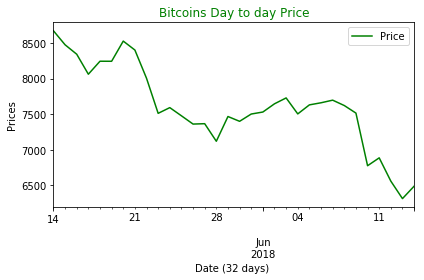

In [35]:
#plot line graph to show bitcoin day to day prices
Bitcoin.sort_index(inplace=True)
Bitcoin['Price'].plot(color='green')
plt.title('Bitcoins Day to day Price', color='green')
plt.xlabel("Date (32 days) ")
plt.ylabel("Prices")
plt.tight_layout()
plt.legend()

In [38]:
Bitcoin

,Price,Open,High,Low,Vol.,Change _Percentage,returns
Date,,,,,,,
2018-05-14,8674.1,8693.4,8878.3,8305.1,212.05K,-0.0022,NaN
2018-05-15,8477.0,8674.0,8842.1,8436.5,179.62K,-0.0227,-0.022723
2018-05-16,8344.4,8477.0,8496.4,8120.1,188.03K,-0.0156,-0.015642
2018-05-17,8063.0,8344.6,8458.7,8022.3,154.36K,-0.0337,-0.033723
2018-05-18,8245.7,8064.4,8273.6,7939.8,150.32K,0.0227,0.022659
2018-05-19,8245.1,8244.7,8389.1,8153.2,107.89K,-0.0001,-0.000073
2018-05-20,8529.0,8243.9,8580.4,8184.7,113.76K,0.0344,0.034433
2018-05-21,8403.3,8529.5,8550.6,8375.5,115.52K,-0.0147,-0.014738
2018-05-22,8006.0,8403.8,8414.5,7979.3,137.51K,-0.0473,-0.047279


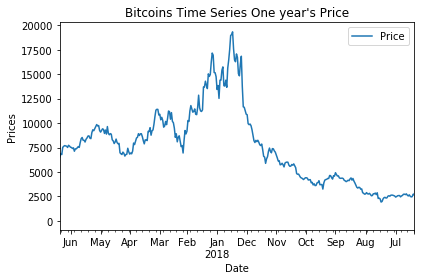

In [37]:
# subdate in time of prices
Bitcoin1018['Price'].plot(xlim=['2018-06-12','2017-06-12'])
plt.title("Bitcoins Time Series One year's Price")
plt.ylabel("Prices")
plt.tight_layout()
plt.legend()